# Ekisk Veri Analizi

İncelenen veri setindeki gözlemlerde eksiklik olması durumudur.  
Eksik verileri silmek ya da direkt doldurmakta bazı problemlere yol açabilmektedir.  

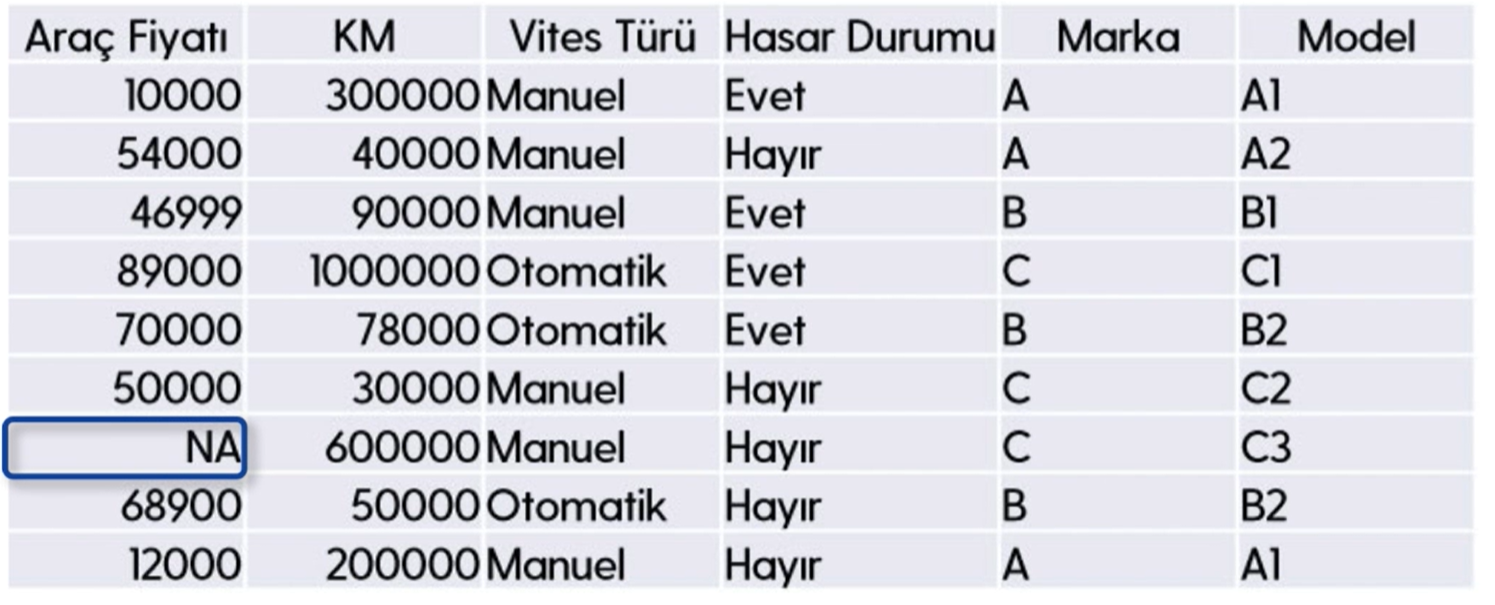 

Eksik değere sahip gözlemlerin veri setinden direk çıkarılması ve rassallığını incelenmemesi  
Yapılacak istatistiksel çıkarımların, modelleme çalışmalarının güvenilirliğini düşürecektir.  
(Alpar, 2011)  
  
Oluşan değerler eğer rastgele oluşmuşsa bunları silebiliyoruz  
aksi halde yapısal problemlerden dolayı ortaya çıkan değerleri olduğu şekliyle silmek problem olabilir.  

Eksik gözlemlerin veri setinden direkt çıkarılabilmesi için veri setindeki  
eksikliğin bazı durumlarda kısmen bazı durumlarda tamamen raslantısal olarak oluşmuş olması gerekmektedir.  
  
Eğer eksik değişkenler ile ilişkili ortaya çıkan yapısal problemler meydana gelmiş ise bu durumda yapılacak silme işlemleri  
ciddi yanlılıklara sebep olabilecektir.  
(Tabachnick ve Fidell, 1996)

# Eksik Veri Analizi Yapılırken Dikkat Edilmesi Gerekenler

1) Veri setindeki eksikliğin yapısal bir eksik olup olmadığının bilinmesi gerek (Kredi kartı yoktur, bu yüzden harcama sıfırdır)  
Bu bir yapısal problem örneğidir ve silinmemelidir.    
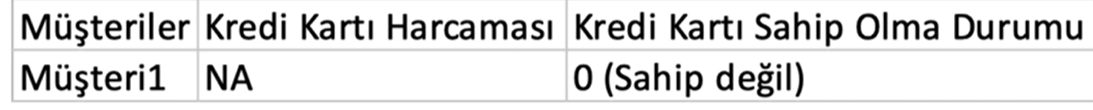  

2) NA her zaman eksik veri anlamına gelmez (Kredi kartı vardır, harcama yapmamıştır (0 veya ölçüm yok anlamına gelir))  
Bu da bir yapısal problem örneğidir ve silinmemelidir.    
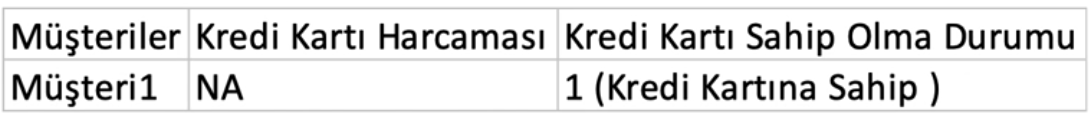  

3) Bilgi Kaybı  
Bir gözlemde değerinde NA değer var diye tüm gözlemi silmek diğer bilgilerin kaybına neden olur.  
İçerisinde bir değer eksik olduğu için diğer bilgileri de kaybetmek çok sakıncalı ve yanlıştır.   
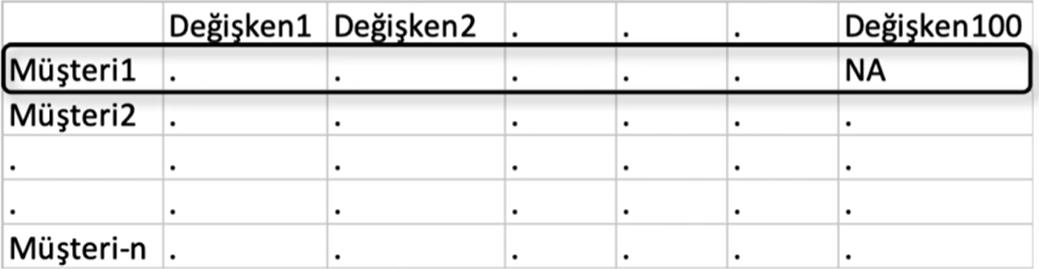  


# Eksik Veri Türleri
Eksik veri türünün bilinmesi, yapılacak işlemin seçilmesinde çok kritik yere sahiptir.  

1) Tümüyle Rastlantısal Kayıp:  Diğer değişkenlerden ya da yapısal problemlerden kaynaklanmayan tamamen rastgele oluşan gözlemler. (-Silinebilir)    
2) Rastlantısal Kayıp:  Diğer değişkenlere bağlı olarak oluşabilen eksiklik türü. (-Belki silinebilir)    
3) Raslantısal Olmayan Kayıp:   Göz ardı edilemeyecek olan ve yapısal problemler ile ortaya çıkan eksiklik türü. (-Silinemez)  

# Eksik Veri Rassallığının Testi

* Görsel Teknikler (**)
* Bağımsız İki Örneklem Testi
* Korelasyon Testi
* MCAR Testi (**) (Missing Completely at Random)

Eksik Veri Rassallığının Testinde en çok kullanılan iki yöntem vardır.  
Görsel Teknikler ve MCAR Testi'dir.  

# Eksik Veri Problemleri Nasıl Giderilir?

1) Silme Yöntemleri
    * Gözlem ya da değişken silme yöntemi
    * Liste bazında silme yöntemi (Listwise Method) (eksik değeri olan tüm gözlemlerin tamamen veri setinden çıkarılması prensibi)
    * Çiftler bazında silme yöntemi (Pairwise Method) (Bu yöntemde eksik veriler içeren gözlemler tamamen çıkarılmaz; bunun yerine, eksik verinin bulunduğu spesifik analizde o gözlem göz ardı edilir.)

2) Değer Atama Yöntemleri
    * Medyan, ortalama gibi değerlerle doldurmak
    * En benzer birime atama (hot deck)
    * Dış Kaynaklı Atama

3) Tahmine Dayalı Yöntemler
    * Makine Öğrenmesi
    * EM
    * Çoklu Atama Yöntemleri

# Eksik Veri Analizi

### Hızlı Çözüm

In [35]:
import pandas as pd
import numpy as np

V1 = np.array([1,3,6, np.NaN, 7, 1, np.NaN, 3, 15])
V2 = np.array([7, np.NaN, 5, 8, 12, np.NaN, np.NaN, 2, 3])
V3 = np.array([np.NaN, 12, 5, 6, 14, 7, np.NaN, 2, 31])

df = pd.DataFrame(
    {
        "V1" : V1,
        "V2" : V2,
        "V3" : V3
    }
)


df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,3.0,2.0,2.0
8,15.0,3.0,31.0


In [144]:
# df içerisinde null değer var mı?

df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [147]:
# df içerisindeki null değer sayısının toplamı?
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [146]:
# tüm df içerisinde kaç null değer var?
df.isnull().sum().sum()

7

In [148]:
# tüm df içerisinde null olmayan değerlerin toplamı

df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [149]:
df.notnull().sum().sum()

20

In [17]:
# Veri seti içerisinde NULL değerlere sahip gözlemlere ulaşmak istersek

df.isnull() # bu formatı DF içerisine koyarsak, buna uygunları getirecektir.

df[df.isnull().any(axis = 1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [15]:
# Veri seti içerisinde NOT NULL değerlere sahip gözlemlere ulaşmak istersek

df.notnull() # bu formatı DF içerisine koyarsak, buna uygunları getirecektir.

df[df.notnull().all( axis=1 )]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,3.0,2.0,2.0
8,15.0,3.0,31.0


# Eksik Değerlerin Direkt Silinmesi

In [150]:
# İçerisinde eksik değer olam gözlemlerin ortadan kaldırılması
df.dropna()  

# kalıcı şekilde silmek istersek
# df.dropna(inplace = True)

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,3.0,2.0,2.0
8,15.0,3.0,31.0


In [29]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,3.0,2.0,2.0
8,15.0,3.0,31.0


# Basit Değer Atama Yöntemi

Ortalama, Mod, Medyan gibi değerlerle basit değer atama işlemleridir.

In [151]:
# V1 içerisindeki NaN değerler

df["V1"]

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7     3.0
8    15.0
Name: V1, dtype: float64

In [152]:
# V1'in ortalaması 

df["V1"].mean()

5.142857142857143

In [153]:
# V1 içerisindeki NaN değerleri V1'in ortalaması ile doldurmak

df["V1"].fillna(df["V1"].mean())

0     1.000000
1     3.000000
2     6.000000
3     5.142857
4     7.000000
5     1.000000
6     5.142857
7     3.000000
8    15.000000
Name: V1, dtype: float64

In [155]:
# V2 içerisindeki NaN değerleri  '0' ile doldurmak

df["V2"].fillna(0)

0     7.0
1     0.0
2     5.0
3     8.0
4    12.0
5     0.0
6     0.0
7     2.0
8     3.0
Name: V2, dtype: float64

# Fonksiyonel Eksik Veri Doldurma Yöntemleri

Birden fazla değişken olmasına karşılık fonksiyonel programlama ile bu işlemleri daha kolay yapabiliriz

In [159]:
# Sırasıyla Adımlar

# DF isimli datafraime üzerine uygula (apply)
# Lambda Uygula
# DF içerisindeki X değerlerini al (Dataframe içindeki değişkenleri)
# Bu X değerlerini kendi ortalamaları ile doldur
# Satırlara göre bu doldurma işlemini yap

df.apply(lambda x : x.fillna(x.mean(), axis = 0))

,V1,V2,V3
0,1.000000,7.000000,11.0
1,3.000000,6.166667,12.0
2,6.000000,5.000000,5.0
3,5.142857,8.000000,6.0
4,7.000000,12.000000,14.0
5,1.000000,6.166667,7.0
6,5.142857,6.166667,11.0
7,3.000000,2.000000,2.0
8,15.000000,3.000000,31.0


# Eksik Veri Yapısının Görselleştirilmesi

Analizlerle göremeyeceğimiz veya rahat ifade edemeyeceğimiz Eksik Veri Analizlerinin görselleştirmeler yardımıyla incelenmesi işlemidir.

In [161]:
# Gerekli install işlemi

!pip install missingno

In [162]:
# gerekli kütüphanenin import edilmesi

import missingno as missno

<Axes: >

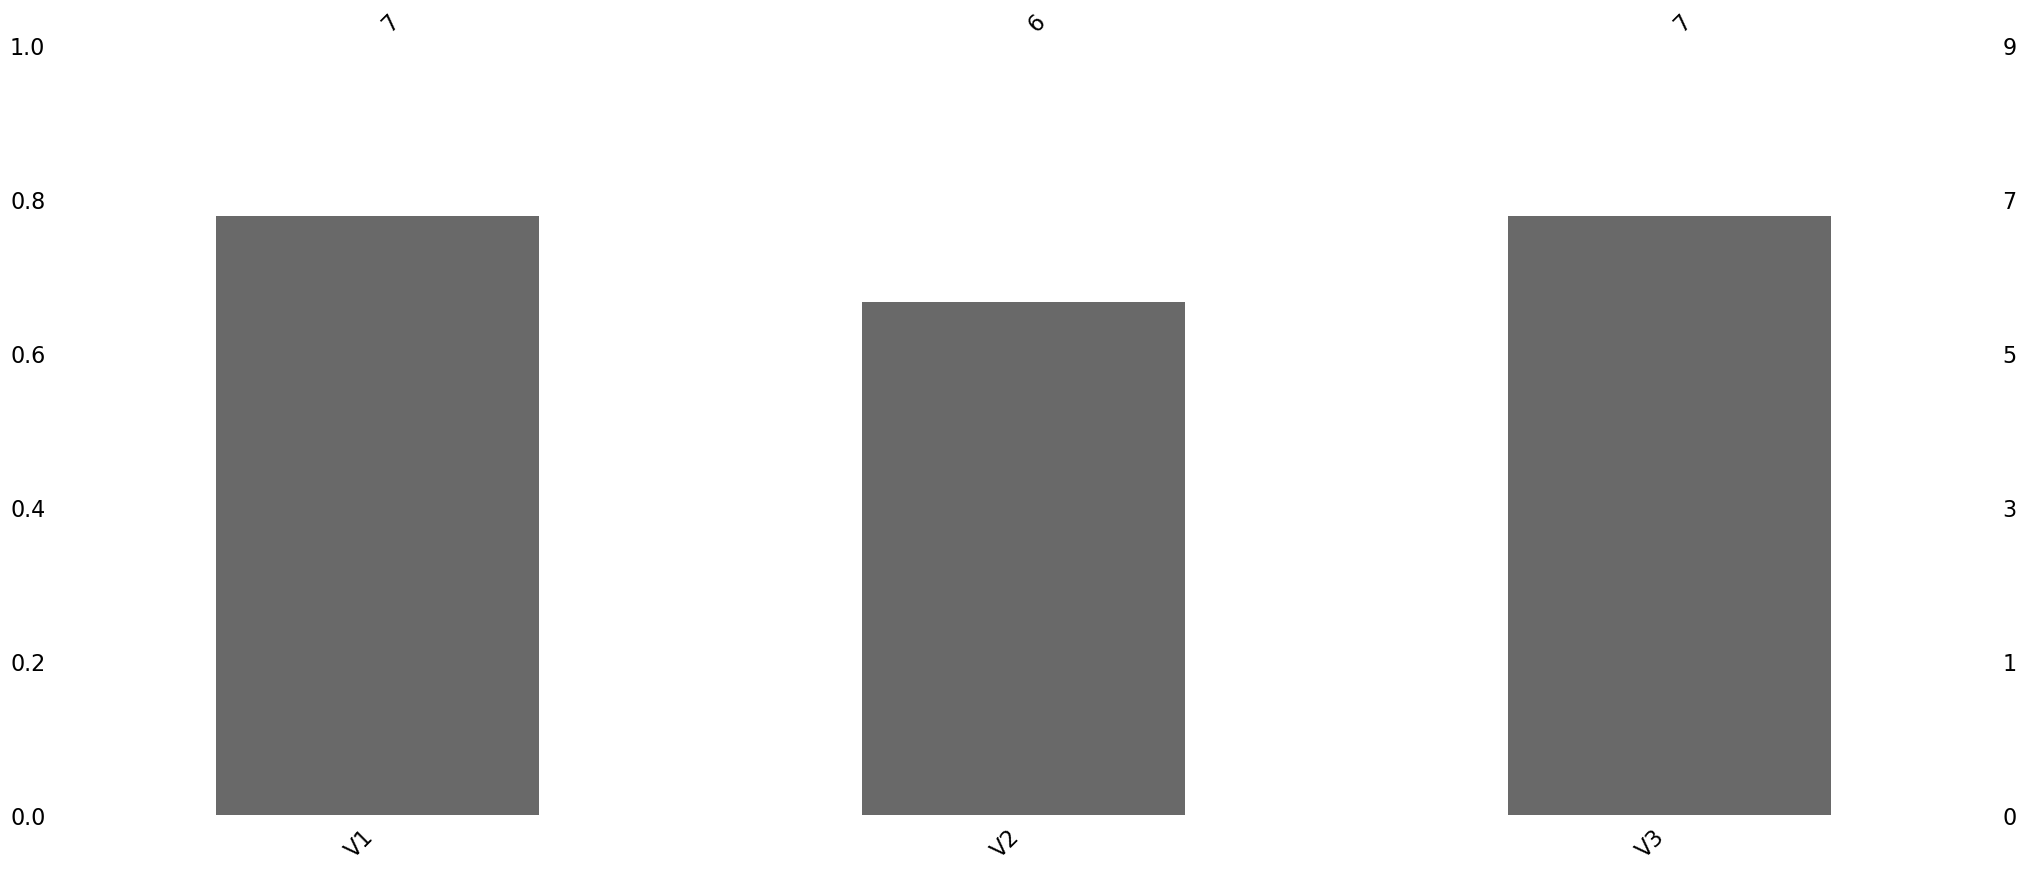

In [163]:
missno.bar(df)

# soldaki yüzdelik kısım, veri setinin tamlığını ifade eder (örn 0.8 = veri setinde %20 eksik değer var demektir.)
# sağdaki sayılar, veri setindeki gözlem sayısını ifade eder
# üst kısımdaki sayılar ise kaç tam ifade olduğunu ifade eder


<Axes: >

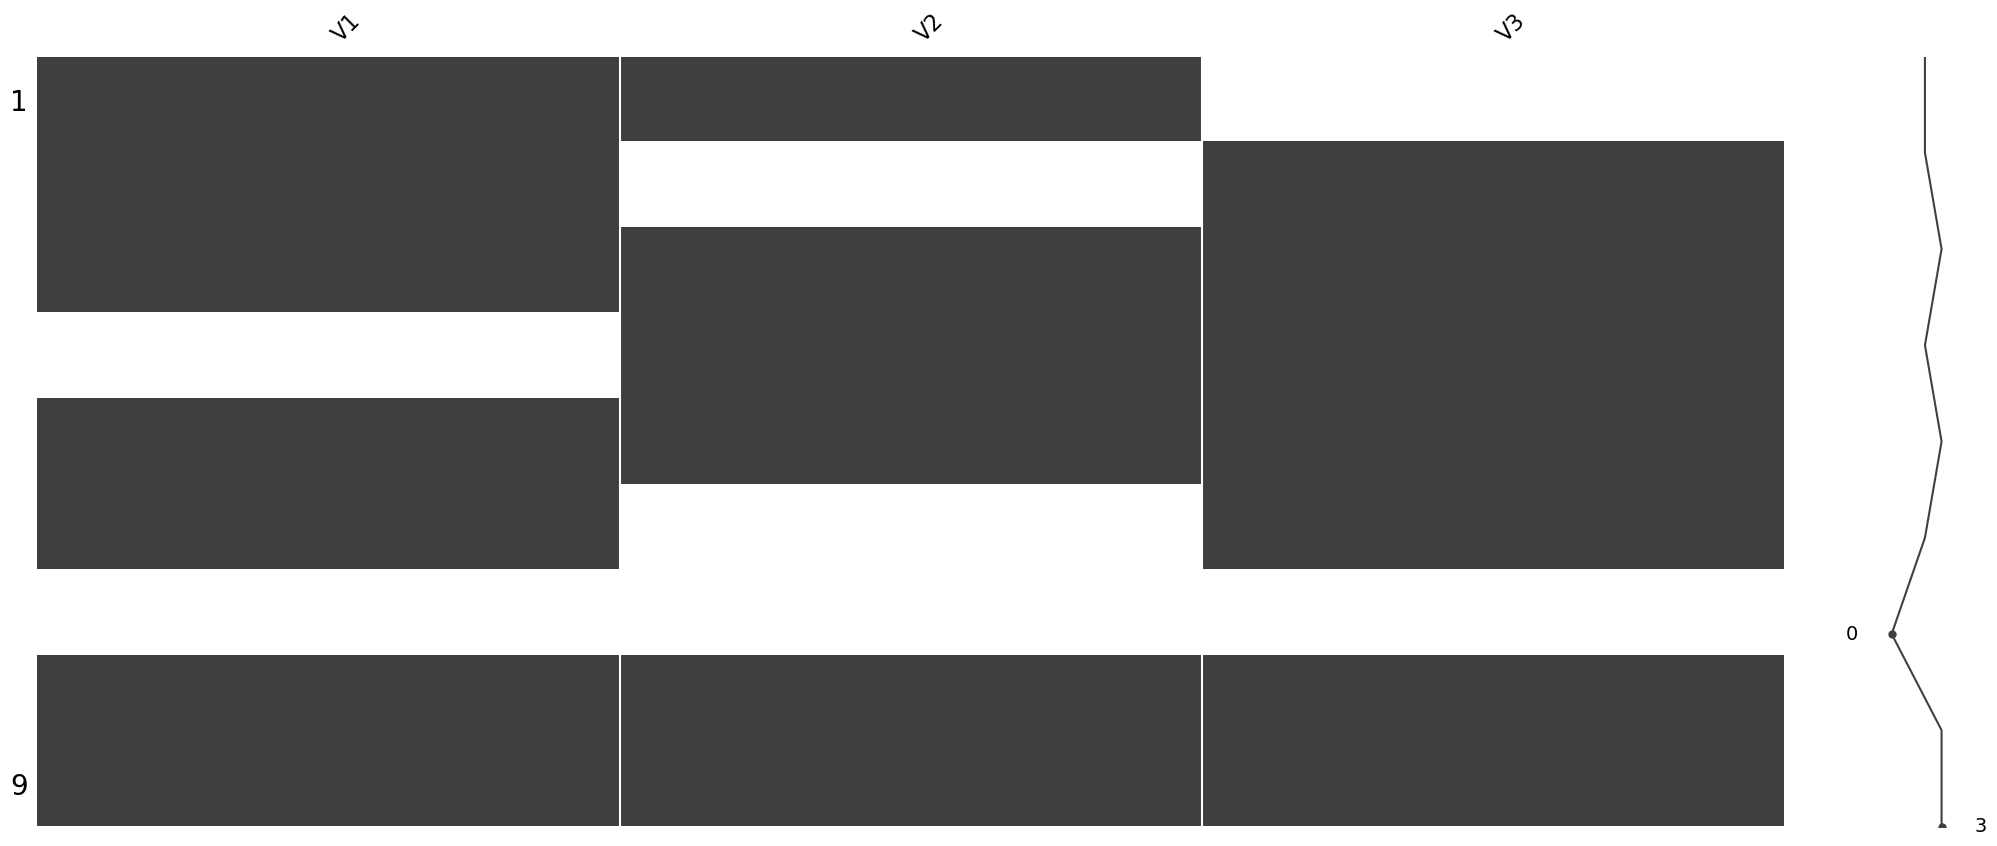

In [164]:
# koyu kısımlar, tam değerleri
# beyaz kısımlar ise eksik değerleri ifade eder
# sağ taraftaki çizgi ise aynı anda dolu veya aynı anda eksik olan değerlerin sayısını ifade eder 

missno.matrix(df)

# Planets Veri Setiyle Eksik Veri Analizi

In [46]:
import seaborn as sns

planets = sns.load_dataset("planets")
df = planets.copy()
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [47]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

# Rassallık İncelemesi

Eksik veri analizine başlarken ilk olarak rassallık incelemesi yapmaktayız.  
Veri setindeki rassallık incelenmeden eksik veriler silinemez ya da doldurulamaz.

<Axes: >

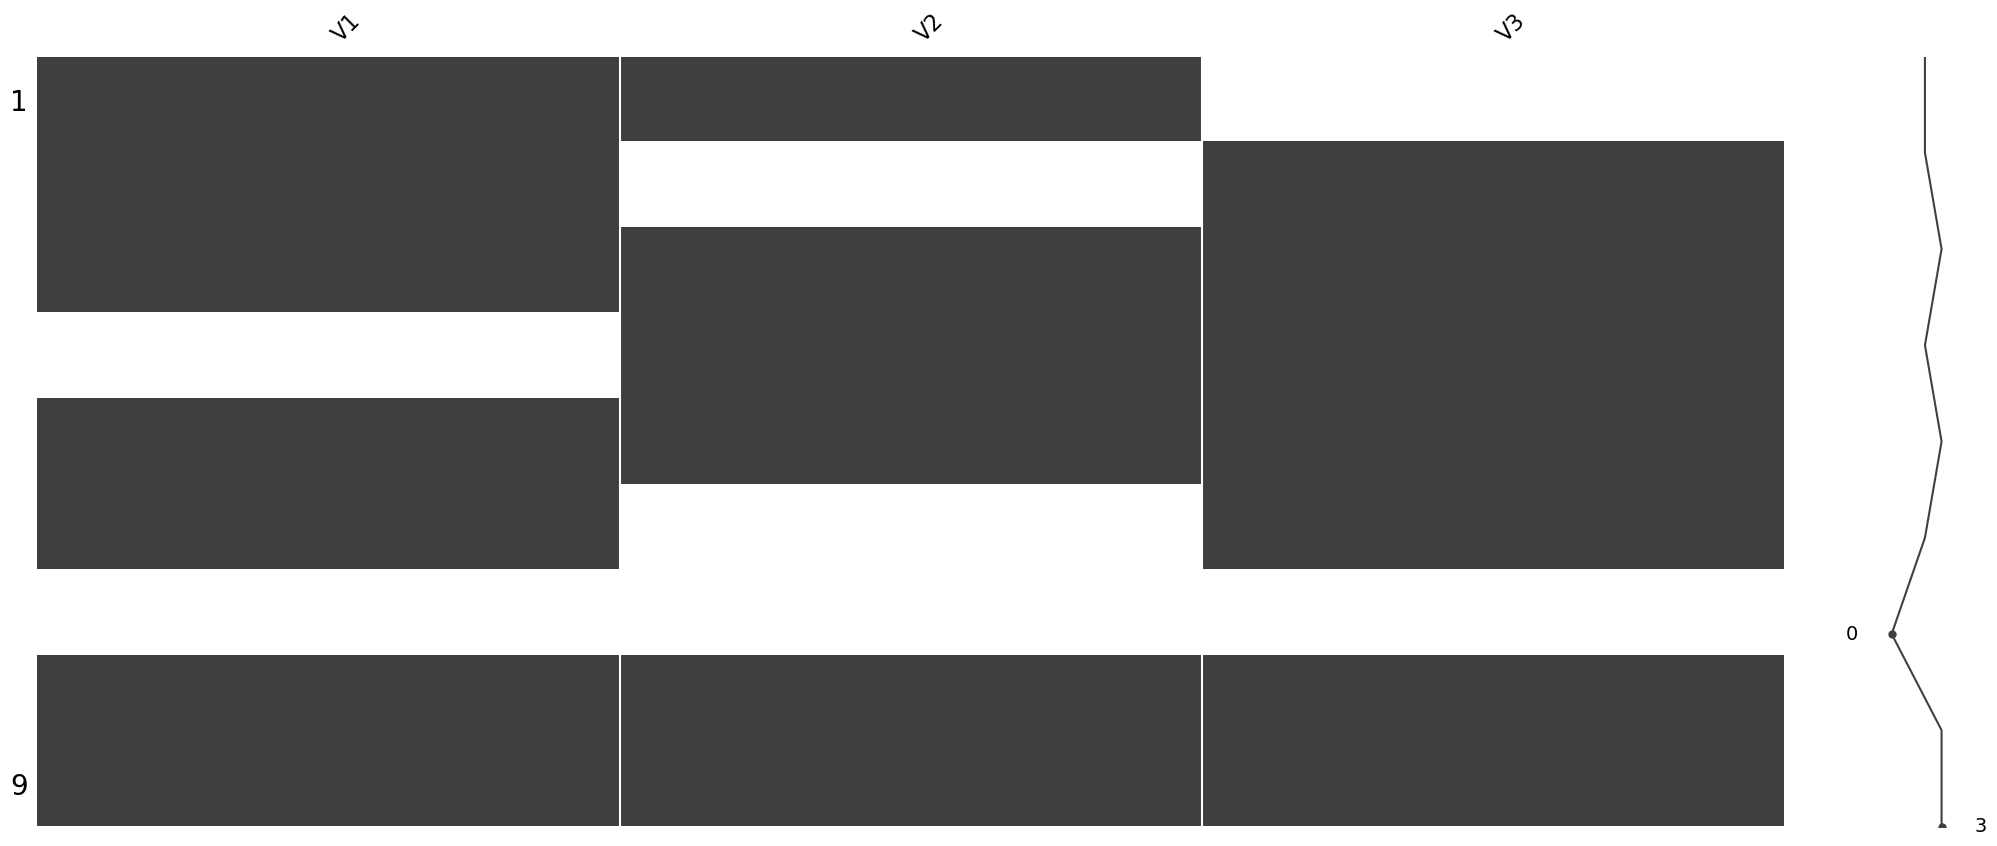

In [142]:
missno.matrix(df)

# matrix incelendiğinde, orbital_period ve mass arasında zayıf bir ilişki var
# mass değişkenindeki değişiklikler, orbital_period'a bağlı olarak gelişmiş 

# yine mass ve distance arasında da orta şiddetli ilişki var
# disstance da değişikler, Mass'e bağlı olarak gelişmiş

<Axes: >

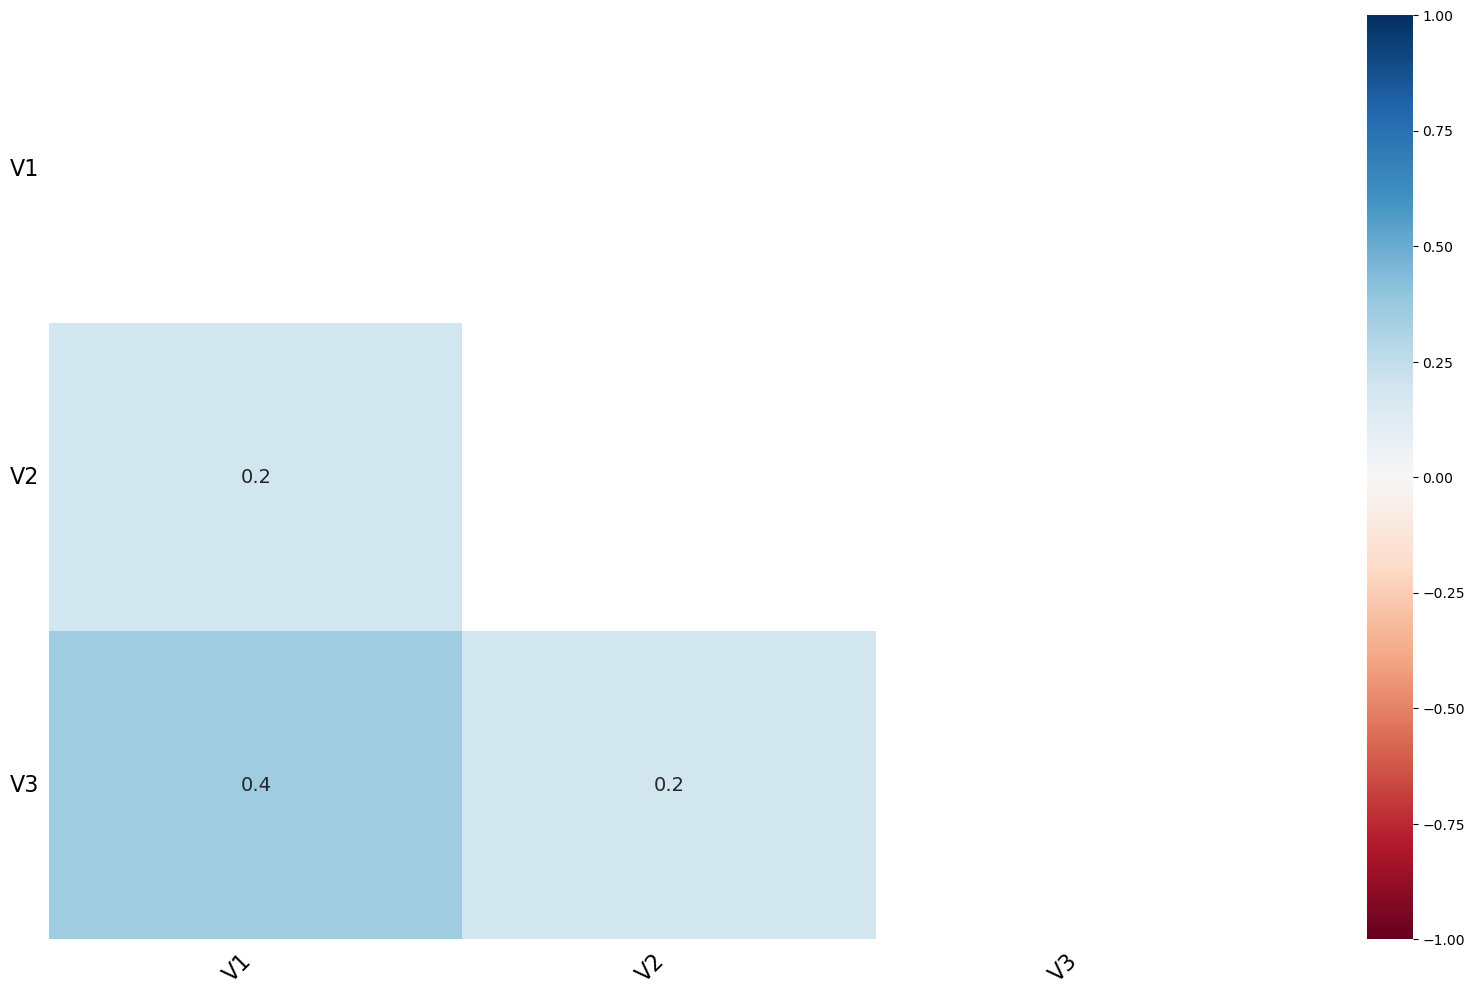

In [143]:
missno.heatmap(df)

# heatmap, nullity correlation (boşluk korelasyonu) değeri vermektedir.
# bu değerler +- 1 arasında yer almaktadır
# değişkenler arasındaki nullity (boşluk) ilişkisini açıklayarak rassal veya değil yorumu yapmamızı sağlar.

# distance ve mass arasında 0,5 korelasyon var (birbirlerini etkileyen -orta-  korelasyon vardır)
# distance ve orbita_period arasında 0 korelasyon vardır (birbirlerini etkileyen korelasyon yoktur)



Bu veri seti Rassal bir eksikliğe sahip değildir.  
Eksik veri analizi yapılacaksa çok dikkat edilmelidir.  
İlişkiler incelenmelidir.  